In [5]:
import opendatasets as od
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
od.download('https://www.kaggle.com/datasets/camnugent/california-housing-prices')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nithinm2962002
Your Kaggle Key: ········


100%|████████████████████████████████████████████████████████████████████████████████| 400k/400k [00:01<00:00, 350kB/s]

In [6]:
os.listdir('.\california-housing-prices')

['housing.csv']

In [7]:
data  = pd.read_csv('.\california-housing-prices\\housing.csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
# It is used to remove null values and inplace is used to update the dataset with only non null values
data.dropna(inplace = True)

In [45]:
# Separating the feature and the labeled data

X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [46]:
# Splitting the Training Data and Test Data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [72]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

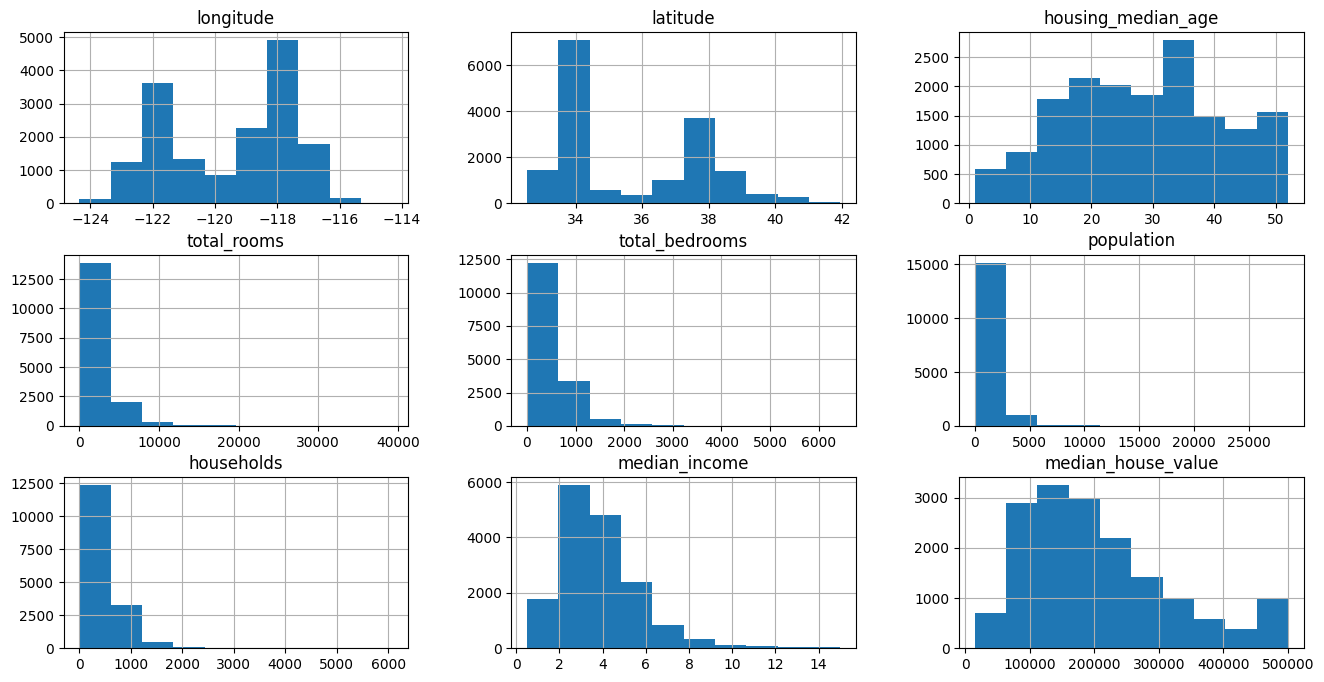

In [48]:
train_data.hist(figsize=(16,8))

C:\Users\nithi\AppData\Local\Temp\ipykernel_8632\2868018029.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')


<Axes: >

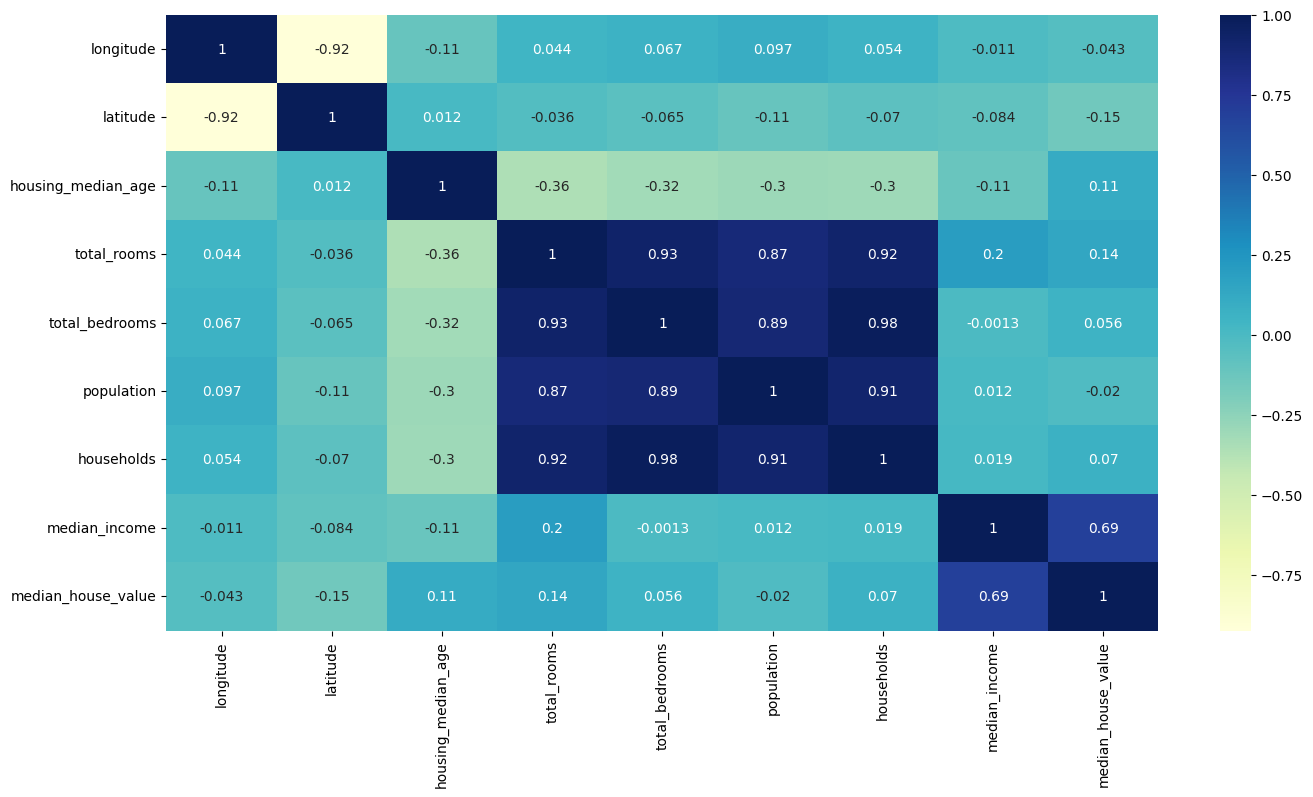

In [49]:
# Plotting the Heat map Figure and analysing the correlation

plt.figure(figsize = (16,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

In [73]:
train_data['population'] = np.log(train_data['population'] + 1)
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

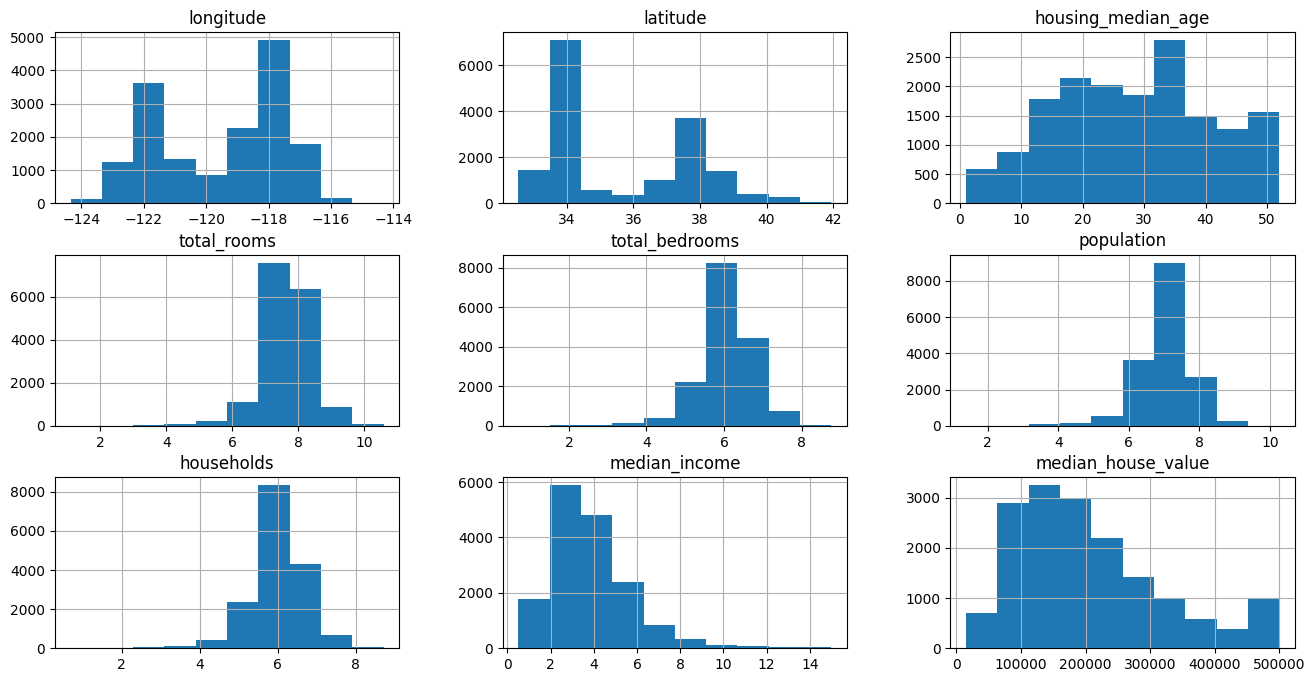

In [51]:
train_data.hist(figsize=(16,8))

In [57]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7217
INLAND        5212
NEAR OCEAN    2094
NEAR BAY      1818
ISLAND           5
Name: ocean_proximity, dtype: int64

In [74]:
# making categorical data to one hot encoding and added to the datasets

train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [75]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4076,-118.45,34.14,33.0,7.462789,5.616771,6.378426,5.590987,7.9625,490800.0,1,0,0,0,0
18602,-122.10,37.19,18.0,6.695799,4.919981,6.042633,4.983607,7.1831,273300.0,0,0,0,0,1
13717,-117.19,34.08,22.0,7.811163,6.320768,7.357556,6.204558,2.6536,84700.0,0,1,0,0,0
12476,-121.48,38.58,48.0,7.797702,6.613384,7.156177,6.496775,1.6277,140600.0,0,1,0,0,0
9550,-120.94,37.40,32.0,7.069874,5.342334,6.652863,5.407172,3.0000,109400.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11680,-118.00,33.84,30.0,7.346010,5.786897,6.786717,5.703782,4.0039,195100.0,1,0,0,0,0
12985,-121.30,38.66,32.0,7.977968,6.200509,7.164720,6.120297,3.3188,117100.0,0,1,0,0,0
4411,-118.25,34.09,52.0,4.653960,3.044522,3.496508,2.890372,3.7500,241700.0,1,0,0,0,0
15207,-117.07,33.00,4.0,8.739216,7.138073,7.701652,7.018402,4.2500,281600.0,1,0,0,0,0


<Axes: xlabel='latitude', ylabel='longitude'>

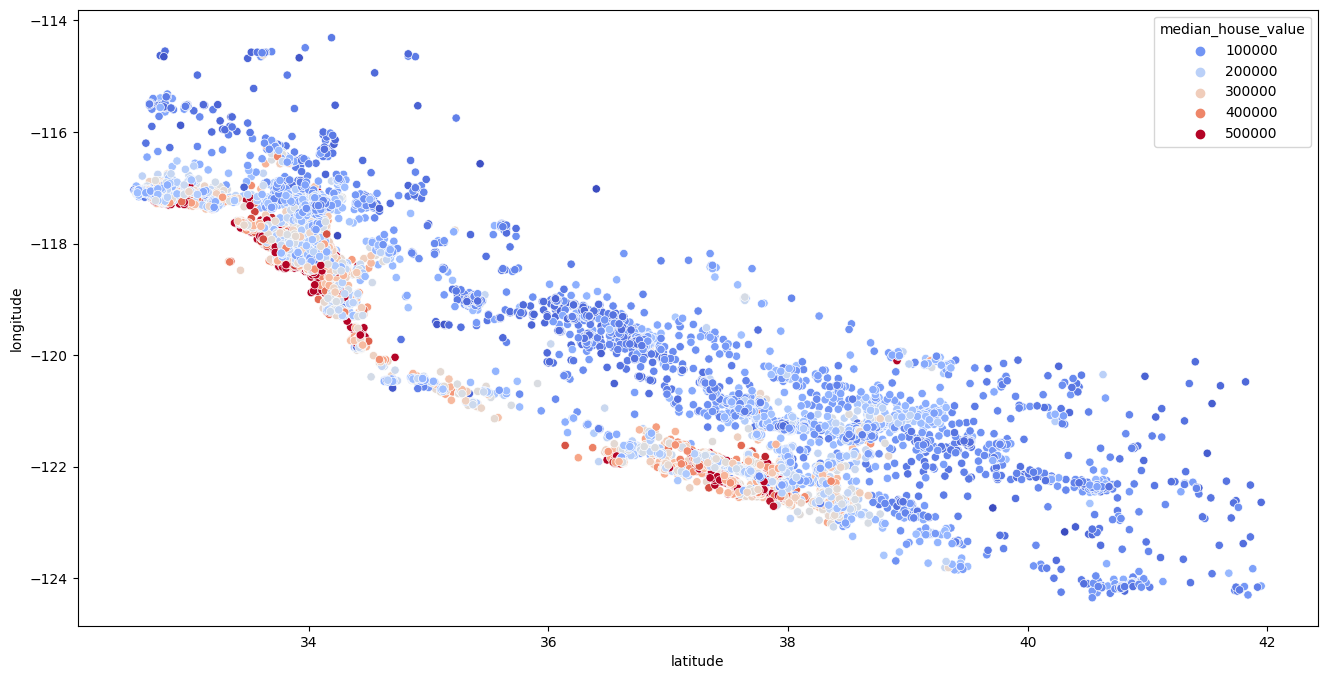

In [78]:
#visualizing the houses

plt.figure(figsize=(16,8))
sns.scatterplot(x='latitude', y = 'longitude', data = train_data, hue='median_house_value', palette = 'coolwarm')